# **APRENDIZAJE SUPERVISADO** - algoritmos principales



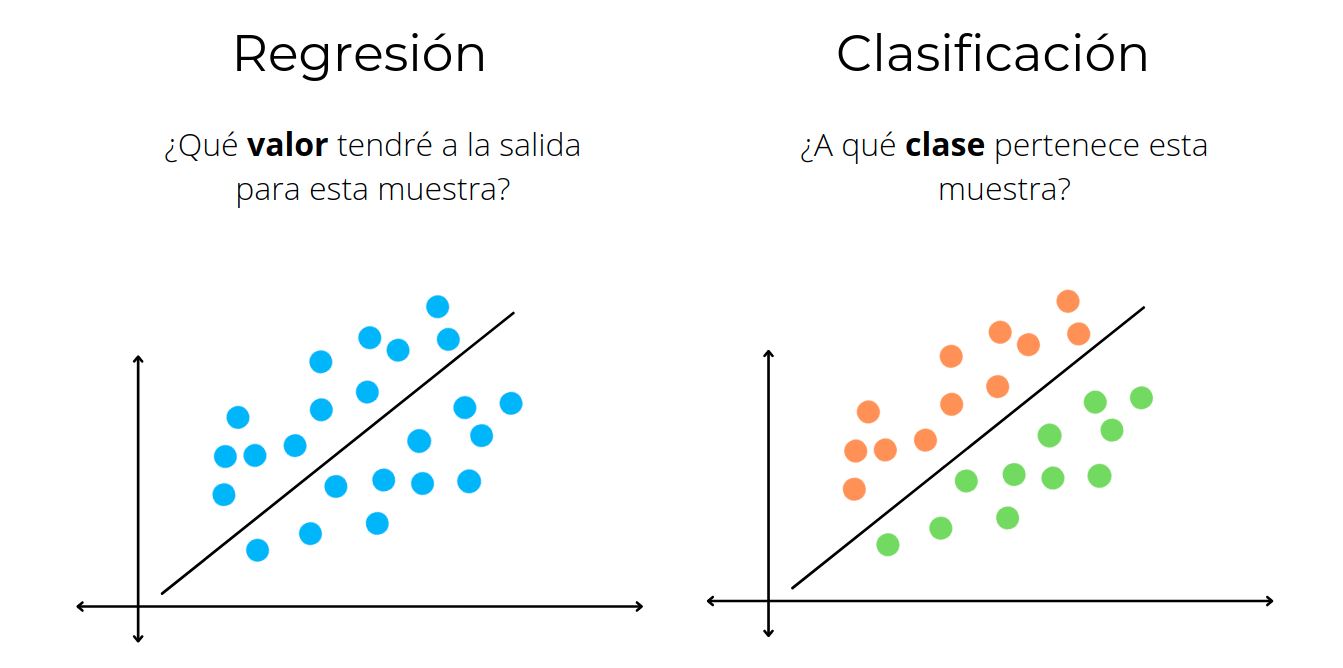

## **Modelos Lineales**

El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor.

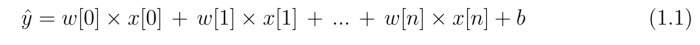

### 1. Regresión lineal

En una regresión lineal el objetivo es obtener una recta, a partir de la cual poder hacer predicciones:

y = a + bx 

donde los coeficientes a(constante) y b(pendiente) se obtienen al ajustar la recta.

Inicialmente estos valores se desconocen, lo que hacemos al pasarles datos es una **estimación** de su valor, pero el error que comete la recta viene dado por el desconocimiento de variables que no están incluidas en el modelo.

En el caso de una regresión lineal simple solo tenemos una variable y la predicción, es caso de tener múltiples variables se le conoce como *regresión lineal múltiple*.

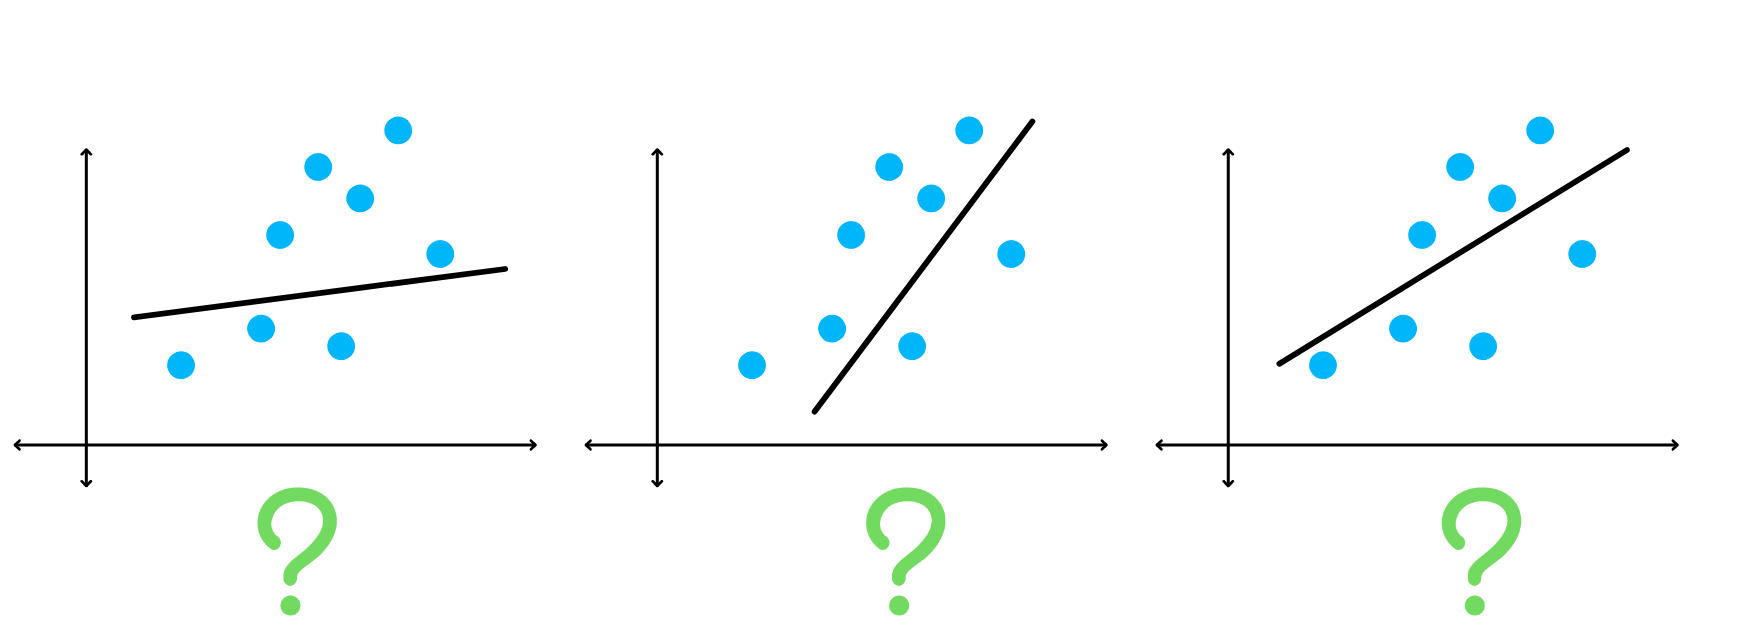

#### Ejemplo
[1]

In [ ]:
#Hacemos los imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) # loads the dataset as a numpy array () - as_frame = True si lo queremos como dataframe
diabetes_X[0:3] # Visualizamos las 3 primeras filas 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes_X.shape # Tenemos 442 filas y 10 variables

(442, 10)

In [ ]:
diabetes_y.shape

(442,)

In [ ]:
# Debido a que estamos haciendo una regresión lineal simple nos quedamos solo con una variable, que va a ser la tercera
# NOTA: Para el supuesto vamos a elegir las variables al azar, pero realmente habría que utilizar técnicas de selección de atributos
diabetes_X = diabetes_X[:, np.newaxis, 2] 
diabetes_X[0:3]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121]])

In [ ]:
#train-test variable
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#train-test target
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# creamos la regresión
regr = linear_model.LinearRegression()

# Entrenamos el agoritmo con los datos
regr.fit(diabetes_X_train, diabetes_y_train)

# Hacemos las predicciones con el test
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# Constante
print("Intercept:", regr.intercept_)

# Coeficientes
print('Coeficiente :', regr.coef_[0])
print('')

print('Ecuación: y =',regr.intercept_,'+',regr.coef_[0],'x')
print('')

# Coeficiente de determinación -> va entre 0 y 1, nos indica cuanto podemos explicar con nuestro algoritmo
# Puede considerarse aceptable a partir de un 0.65, sin embargo 0.7 - 0.8 son valores deseables.
print('Coeficiente de determinación: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Intercept: 152.91886182616167
Coeficiente : 938.2378612512637

Ecuación: y = 152.91886182616167 + 938.2378612512637 x

Coeficiente de determinación: 0.47


#### Coeficiente de determinación

R2, el coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos:

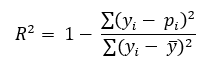



*   yi son los valores que toma la variable objetivo
*   pi son los valores de la predicción
*   ȳ es el valor medio de los valores que toma la variable objetivo

Scikit-Learn implementa esta métrica en sklearn.metrics.r2_score

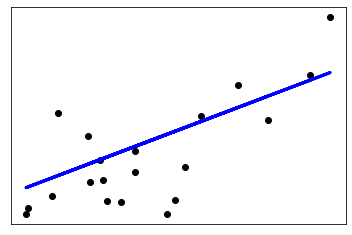

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Regresión múltiple

En caso que quisieramos hacer una regresión múltiple

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# En este caso seleccionamos 3 variables
diabetes_X = diabetes_X[:,2:5]  
diabetes_X.shape

(442, 3)

In [ ]:
#train-test variable
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#train-test target
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# creamos la regresión
regr = linear_model.LinearRegression()

# Entrenamos el agoritmo con los datos
regr.fit(diabetes_X_train, diabetes_y_train)

# Hacemos las predicciones con el test
diabetes_y_pred = regr.predict(diabetes_X_test)

# Se crean tres coeficientes, pero aún así no se mejora el resultado
print('Coeficientes : \n', regr.coef_) 

# Error cuadrático medio
print('Error medio cuadrático: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Coeficiente de determinación -> va entre 0 y 1, nos indica cuanto podemos explicar con nuestro algoritmo
# Puede considerarse aceptable a partir de un 0.65, sin embargo 0.7 - 0.8 son valores deseables.
print('Coeficiente de determinación: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coeficientes : 
 [770.91913228 400.70644175  53.99579803]
Error medio cuadrático: 2582.11
Coeficiente de determinación: 0.47


#### Función de coste

Mean Squared Error o error cuadrático medio es la función de error más básica y se define como el valor medio de los cuadrados de la diferencia entre los valores predichos y los valores reales:

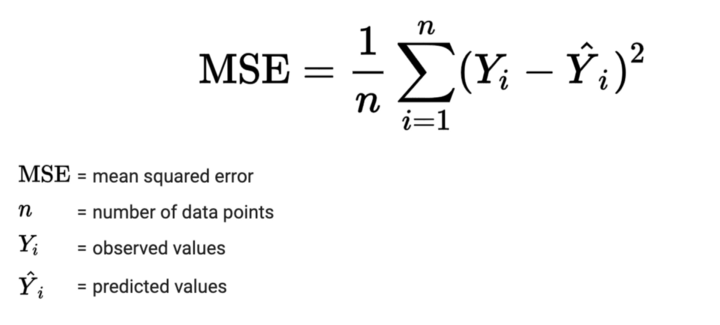

### 2. Regresión logística

A pesar de su nombre, es un algoritmo usado para la **clasificación**. Este modelo nos permite discernir entre dos clases binarias de las cuales nos devolverá la *probabilidad* de que pertenezca a una de ellas. A partir de ahí será necesario que exista un threshold (umbral) que defina a partir de que probabilidad se considera que pertenece a una clase u otra.


Este modelo depende de la regresión lineal en tanto que las salidas obtenidas por un modelo de regresión lineal son convertidas mediante la función **sigmoide** a un valor entre 0 y 1. Por lo tanto solo puede usarse para clasificaciones binarias.

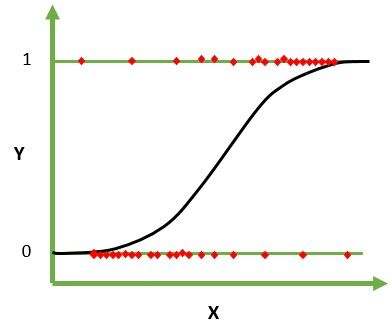

#### Ejemplo
[2]

In [12]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [13]:
# El problema que se plantea consiste en predecir cual si un alumno puede conseguir matricula de honor a su nota en matemáticas
# Generamos nosotros mismos los datos

matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

matematicas = np.array([
                  41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

datos = pd.DataFrame({'matricula': matricula, 'matemáticas': matematicas})
datos.head(3)

,matricula,matematicas
0,0,41
1,0,53
2,0,54


In [ ]:
datos.matricula.value_counts().sort_index()

0    151
1     49
Name: matricula, dtype: int64

In [14]:
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state = 1234)

# Los valores de la variable objetivo no están balanceados
modelo = LogisticRegression(class_weight='unbalanced')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='unbalanced')

In [15]:
# Información del modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))

print("Accuracy:", modelo.score(X_test, y_test))

Intercept: [-8.97891603]
Coeficiente: [('matematicas', 0.14383005099382726)]
Accuracy: 0.875


In [ ]:
# Vamos a aplicar predict_proba(), que devuelve la probabilidad predicha de pertenecer a cada una de las dos clases
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(5)

,0,1
0,0.685810,0.314190
1,0.838022,0.161978
2,0.443688,0.556312
3,0.479417,0.520583
4,0.956139,0.043861


In [ ]:
# Con predict() tendremos la clasificación predicha por el modelo
predicciones = modelo.predict(X = X_test)
predicciones

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_test

array([[57],
       [51],
       [64],
       [63],
       [41],
       [52],
       [51],
       [45],
       [62],
       [46],
       [50],
       [73],
       [49],
       [72],
       [42],
       [61],
       [45],
       [49],
       [46],
       [40],
       [55],
       [56],
       [53],
       [38],
       [65],
       [41],
       [52],
       [54],
       [56],
       [41],
       [42],
       [42],
       [43],
       [43],
       [52],
       [51],
       [52],
       [55],
       [45],
       [55]])

## **Support Vector Machines (SVM)**
[3]

Tienen tres funciones principales:
1. Clasifiación
2. Regresión
3. Detección de valores atípicos (outliers)
El objetivo es encontrar un hpierplano en un espacio N-dimensional (N es el número de atributos) que clasifique los distintos puntos.

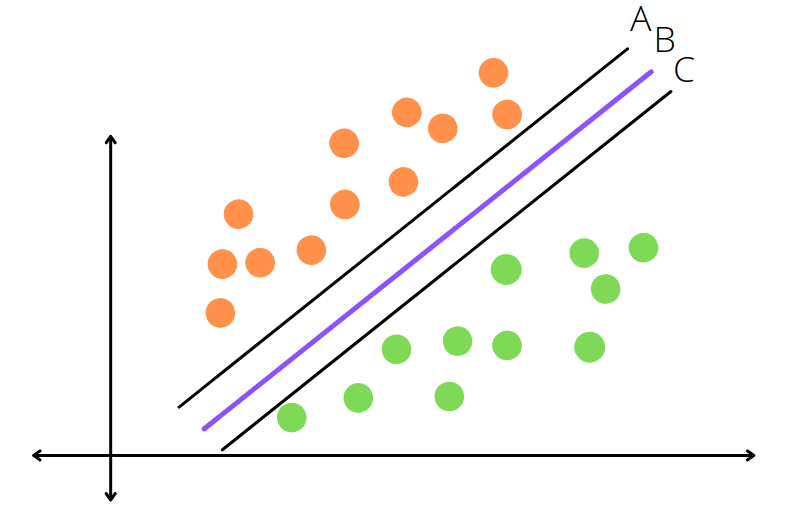

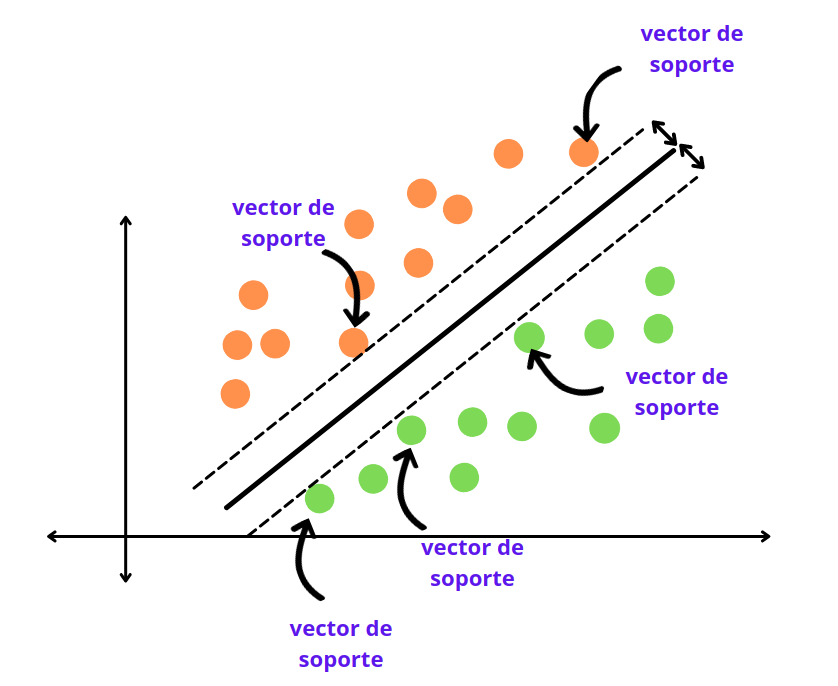

Cogeremos la línea que maximize la distancia entre el elemento de cada clase que tenga más cerca.

En el caso que tengamos:
* 2D -> separemos las clases mediante una línea
* 3D -> separaremos las clases con un plano
* 4D o + -> separaremos las clases mediante un hiperplano

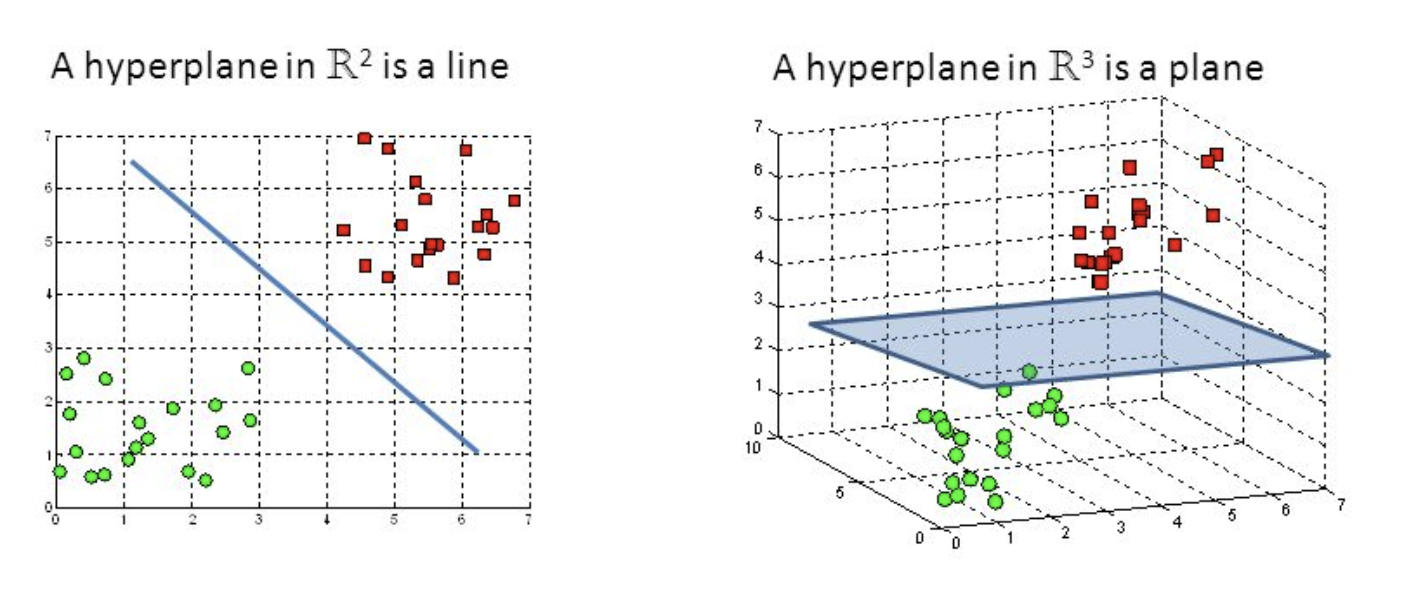

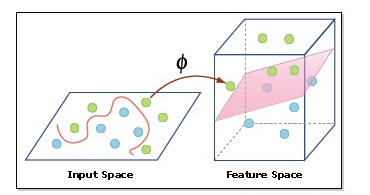

### Clasificación
Disponemos de tres algoritmos capaces de hacer clasificación mediante SVM:
1. SVC
2. NuSVC
3. LinearSVC

#### Ejemplo 1

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [17]:
cancer.data.shape

(569, 30)

In [18]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [19]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


#### Ejemplo 2

In [43]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df.Species.unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
df.shape

(150, 6)

In [45]:
# Como tenemos tres clases vamos a eliminar una especie para quedarnos con una clasificación binaria
df = df.drop(df[df['Species']=='Iris-virginica'].index)

In [46]:
df.shape

(100, 6)

In [47]:
df.Species.unique() 

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [48]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

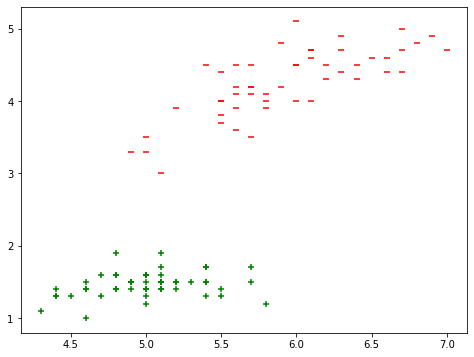

In [49]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [50]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop rest of the features and extract the target values
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred

array([-1,  1,  1,  1,  1, -1, -1,  1, -1, -1])

In [53]:
y_test

array([[-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1]])

### Regresión
[4]

Vamos a predecir el salario de un empleado

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [77]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [78]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [79]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [80]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1)) 
y_pred

array([[252789.13921624]])

## **Árboles de decisión (Decision Trees)**

Son algortimos diseñados para:
* Regresión
* Clasificación

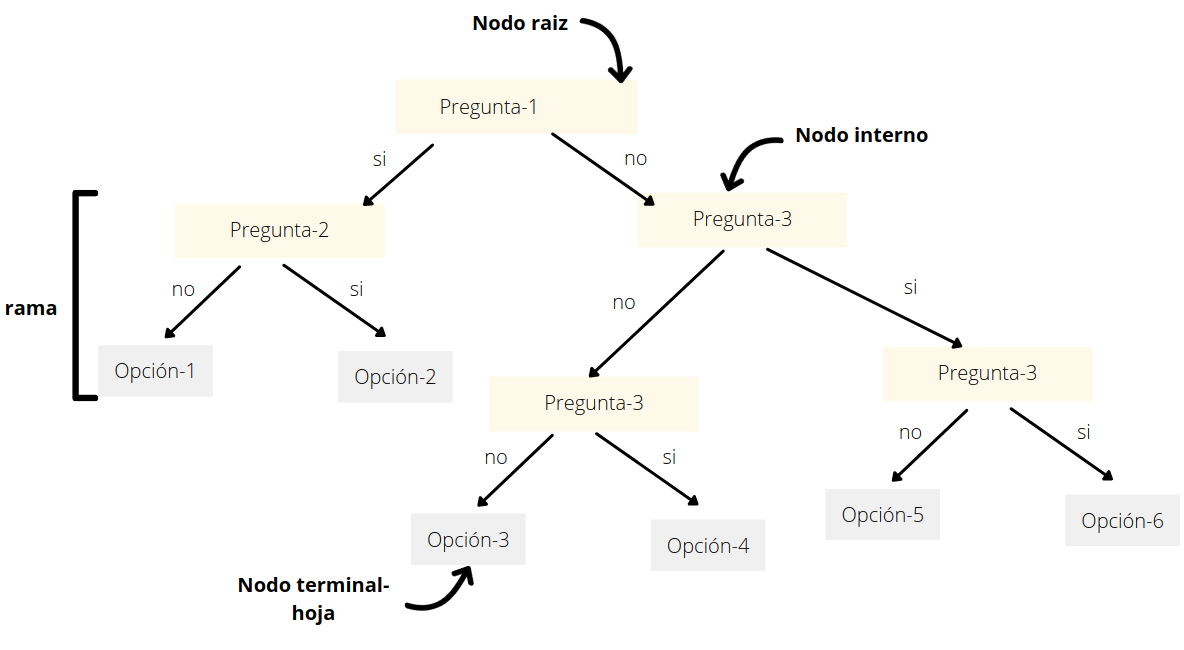

Decision stump -> árbol de decisión de un solo nivel

#### Clasificación
[5] 

In [81]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
#Importamos los módulos necesarios
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 


#Inicializamos el dataset
iris = load_iris()
#Separamos las variables de la variable a predecir
X, y = iris.data, iris.target
#Inicializamos el modelo
clf = tree.DecisionTreeClassifier()
#Entrenamos
clf = clf.fit(X, y)

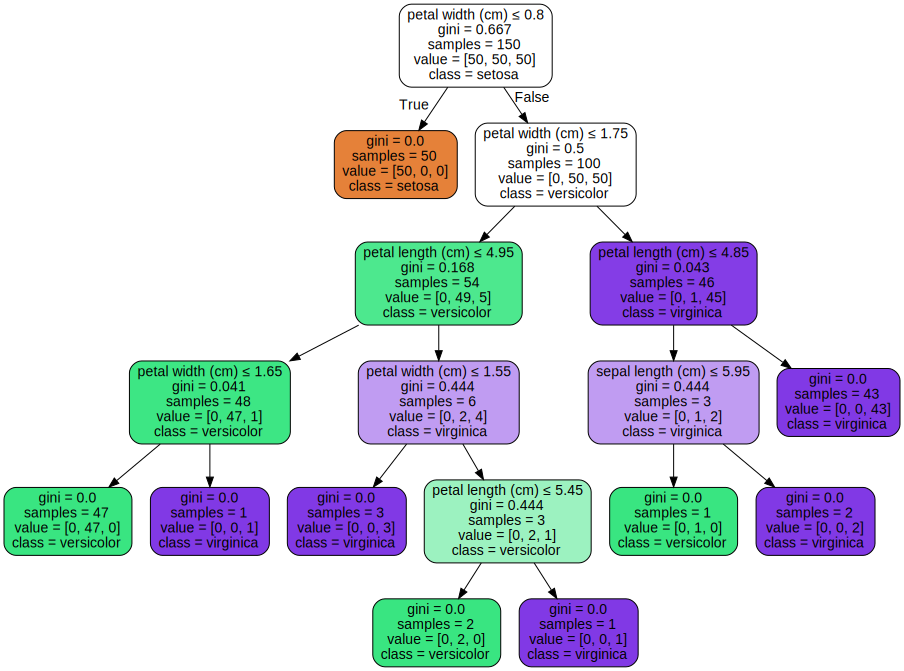

In [84]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

De la información que podemos observar en el gráfico destacamos:
* Gini: Impureza de las muestras que tenemos, es decir si gini = 0, significa que todas las muestras son de la misma clase, sin embargo cualquier valor superior indicara que hay una mezcla de muestras.
* Samples: Cuantas muestras han caído en ese nodo.
* Value: Array que indica cuantas muestras de cada tipo tenemos.
* Class: Nombre de la clase mayorítaria presente en ese nodo u hoja.

#### Regresión
[6]

In [86]:
# import numpy package for arrays and stuff
import numpy as np

# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt

# import pandas for importing csv files
import pandas as pd


In [87]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

# print the dataset
print(dataset)


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [88]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int)

# print X
print(X)


[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [89]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int)

# print y
print(y)


[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [90]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [91]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])

# print the predicted price
print("Predicted price: % d\n"% y_pred)


Predicted price:  8000



# Descenso de gradiente estocástico -> Stochastic Gradient Descent (SGD)
**! No es un algoritmo en si mismo, sino que es un méotdo de optimización para las funciones de pérdida**

**¿Qué es la función de pérdida?** 

Cuando nosotros realizamos una predicción durante el entrenamiento se evalua la diferencia entre el valor real y el valor que hemos predicho. El método emparado para evaluar esta diferencia se le conoce como función de pérdida. Por lo tanto nuestro objetivo es minimizarlo.

Para cada una de las muestras la diferencia entre el valor real y el predicho se le conoce como **residual**.

Por ejemplo en un problema de regresión la función de pérdida que se emplea es  Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))², la suma de cuadrados de los residuos, o también sería posible evaluarlo usando MSE = SSR / 𝑛 el error cuadrático medio.

Por lo tanto lo que nos interesa es obtener el valor mínimo, y como lo obtenemos, cambiando los parámetros de nuestra función.


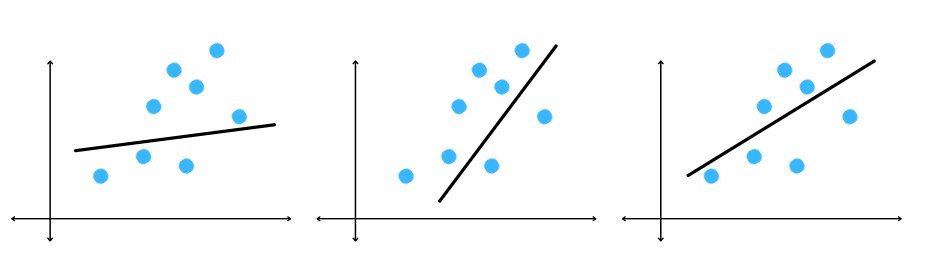

Por ejemplo, para cada una de las situaciones planteadas en los graficos de arriba obtendremos un valor u otro ya que no tienen el mismo intercepto (n) ni pendiente (m): y = mx + n. Por lo tanto variando estos valores es como obtenemos una recta óptima o no. **Nuestro objetivo por lo tanto es obtener los valores de m y n que hagan que obtengamos la recta más óptima que se ajuste a los datos**

PD: En el caso de una clasificación (regresión logística) nuestra función de pérdida seria la entropía cruzada.

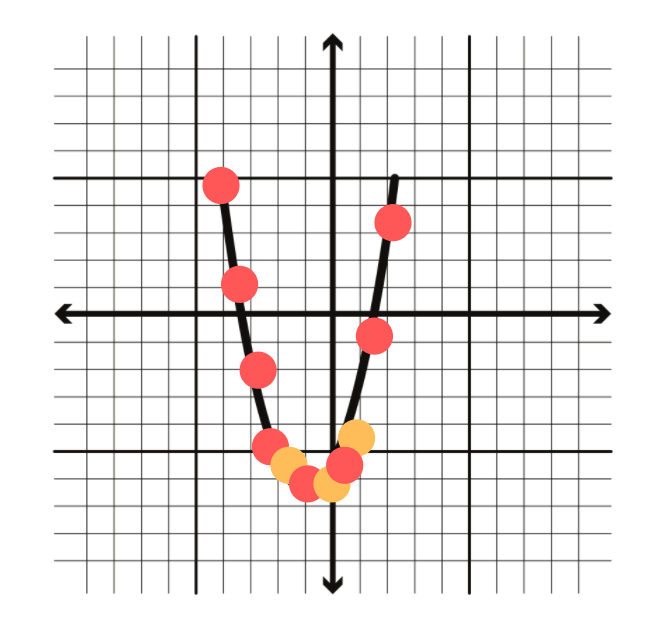

En primer lugar vamos a hablar del **descenso de gradiente**. Esta metodología nos sirve para encontrar el punto más óptimo en la función de pérdida. ¿Y qué es la **función de pérdida**? Es una equación, como por ejemplo en el caso de la funición lineal (ypred - yreal)^2 que nos permite evaluar cuanto se ajusta nuestra función a los datos que tenemos. 

Para encontrar el mínimo de una función una de las opciones es ir probando punto a punto e ir comprovando que se reduce su pendiente por ejemplo, o hacer la derivada y para encontrar el mínimo la igualamos a cero. Sin embargo de estos métodos surgen dos problemas; en el primer caso se plantea el problema computacional, es muy costoso ir probando punto a punto, mientras que en el segundo caso que sucede con aquellas funciones que no pueden ser igualadas a cero. Ante esta situacion surge el descenso de gradiente el cual es una combinación de ambos métodos. 

Por una parte el descenso de gradientes sigue con la idea de ir iterando punto a punto, debido a que no podemos igualar directamente a cero, sin embargo no prueba infinitos puntos, sino que dependiendo de la pendiente que se obtiene con la derivada, lo que hace es dar saltos más o menos grandes, de tal manera que cuando este cerca del cero, dará pasos muy pequeños.

Sin embargo, aún siendo un método muy eficiente, en caso de tener una base de datos con 500 muestras (filas) y 30 variables (columnas) tendríamos que hacer 30 derivadas para cada muestra x 500 muestras, puede verse como computacionalmente a medida que nuestras bases de datos van creciendo se vuleve insostenible.

¿Cuál es la solución entonces? **Descenso de gradiente estocástico** El mismo nombre define el método, estocástico significa aleatorio, por lo tanto de todas las muestras que tenemos no se usarán todas sino que se escogeran de manera aleatoria. **¿Pero entonces no estamos perdiendo información?**

Este algoritmo se basa en el concepto de que si por ejemplo estamos haciendo una clasificación, las muestras de la misma clase estarán agrupadas en espacios cercanos, por esta razón pueden elidirse algunas de las muestras de este conjunto y reducir el coste computacional.

**! Importante el procesado de los datos:** En este caso por ejemplo el SCG es muy sensible al escalado de los datos, es un paso claro antes de proceder a aplicar el modelo.

#### Ejemplo implementación

In [ ]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)
clf.predict([[2., 2.]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1])

In [ ]:
clf.coef_

array([[9.91080278, 9.91080278]])

In [ ]:
clf.intercept_

array([-9.99002993])

**¿Qué cambia entre una regresión y una clasificación?**

# Métricas y su importancia

**Atención!** No debemos confundir las métricas con la función de perdida. En el segundo caso son funciones que empleamos a la hora de entrenar nuestros algoritmos y por consiguiente como se ha visto son derivables. Mientras que las métricas nos sirven para ver como funciona nuestro modelo con los datos de test. Sin embargo, si que es cierto que hay algun caso en que una métrica puede ser empleada como función de pérdida como veremos a continuación. Otra diferencia es que las metricas pueden emplearse generalmente con cualquier modelo, mientras que las funciones de pérdida son particulares para cada uno de los algoritmos.

## Clasificación

### **Accuracy** - Exactitud

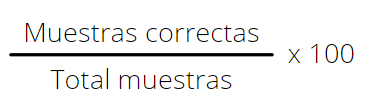

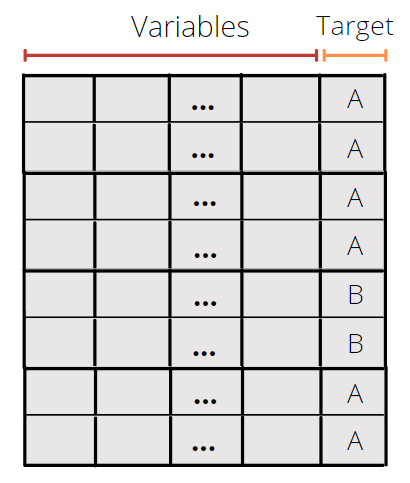

¿Cuál es el problema que podemos observar en la tabla superior? El dataset que tenemos está desbalanceado, lo que signficia que tenemos muchas más muestras de una clase que de otra. ¿Qué implica a nivel del algoritmo? Surgen dos problemas:
1. A la hora de entrenar el modelo aprenderá más de una clase que de otra por lo tanto será más probable que de como output que un elemento forma parte de esa clase.
2. Por otro lado si el dataset del test es igual y ha aprendido muy bien una clase, nos dará una accuracy muy alta, pero sin embargo sera una falsa ilusión.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

### **Confusion Matrix** - Matriz de confusión

Ante el problema que surge con la accuracy es interesante ver en más detalle como hace la predicción. Por esta razón se usan las matrices de confusión, en las cuales podemos ver en detalle como predice los elementos de cada clase.

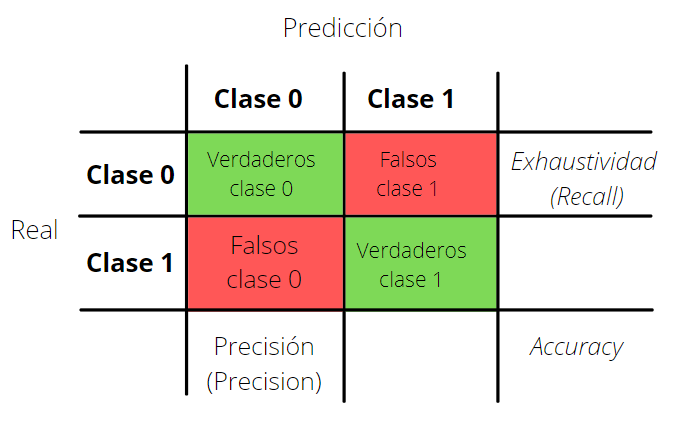

A partir de esta tabla surgen dos métricas más: Exhaustividad y Precisión.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
'''
tn = true negative -> los de la classe 0 se han clasificado como clase 0
tp = true positive -> los de clase 1 se han clasificado como clase 1
fp = false positive -> los de la clase 1 se han clasificado como clase 0
fn = false negative -> los de la clase 0 se han clasificado como clase 1

'''
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

#esto solamente puede hacerse con clases binarias.

(0, 2, 1, 1)

**Precisión**

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
y_true = [0, 1, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 0]
precision_score(y_true, y_pred, average='binary')

1.0

In [ ]:
y_true = [0, 0, 1, 1, 0, 0]
y_pred = [0, 1, 1, 1, 0, 0]
precision_score(y_true, y_pred, average='binary')

0.6666666666666666

**Recall**

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
y_true = [0, 1, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 0]
recall_score(y_true, y_pred, average='binary')

0.6666666666666666

In [ ]:
y_true = [0, 0, 1, 1, 0, 0]
y_pred = [0, 1, 1, 1, 0, 0]
recall_score(y_true, y_pred, average='binary')

1.0

**Matriz de confusión multiclase**

In [ ]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### **F1 Score**

Es interesante conocer el valor de la exhaustividad y la precisión, sin embargo una métrica que pueda mezclar ambos conceptos puede añadir valor en situaciones en donde nos interesen ambos casos. -> usada en situaciones de desbalanceo de los datos.

F1-score= 2*Precision*Recall/(Precision+Recall)

In [ ]:
from sklearn.metrics import f1_score

y_true = [0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 1, 0, 0]
f1_score(y_true, y_pred, average='binary')

0.5714285714285715

In [ ]:
y_true = [0, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 1, 0, 0]
accuracy_score(y_true, y_pred)

0.5

### **Curva ROC**

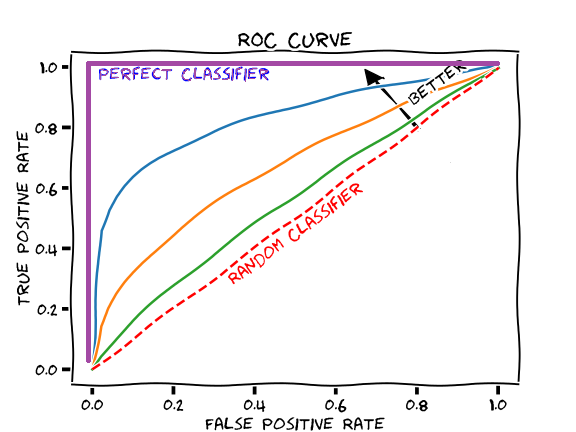

[5]

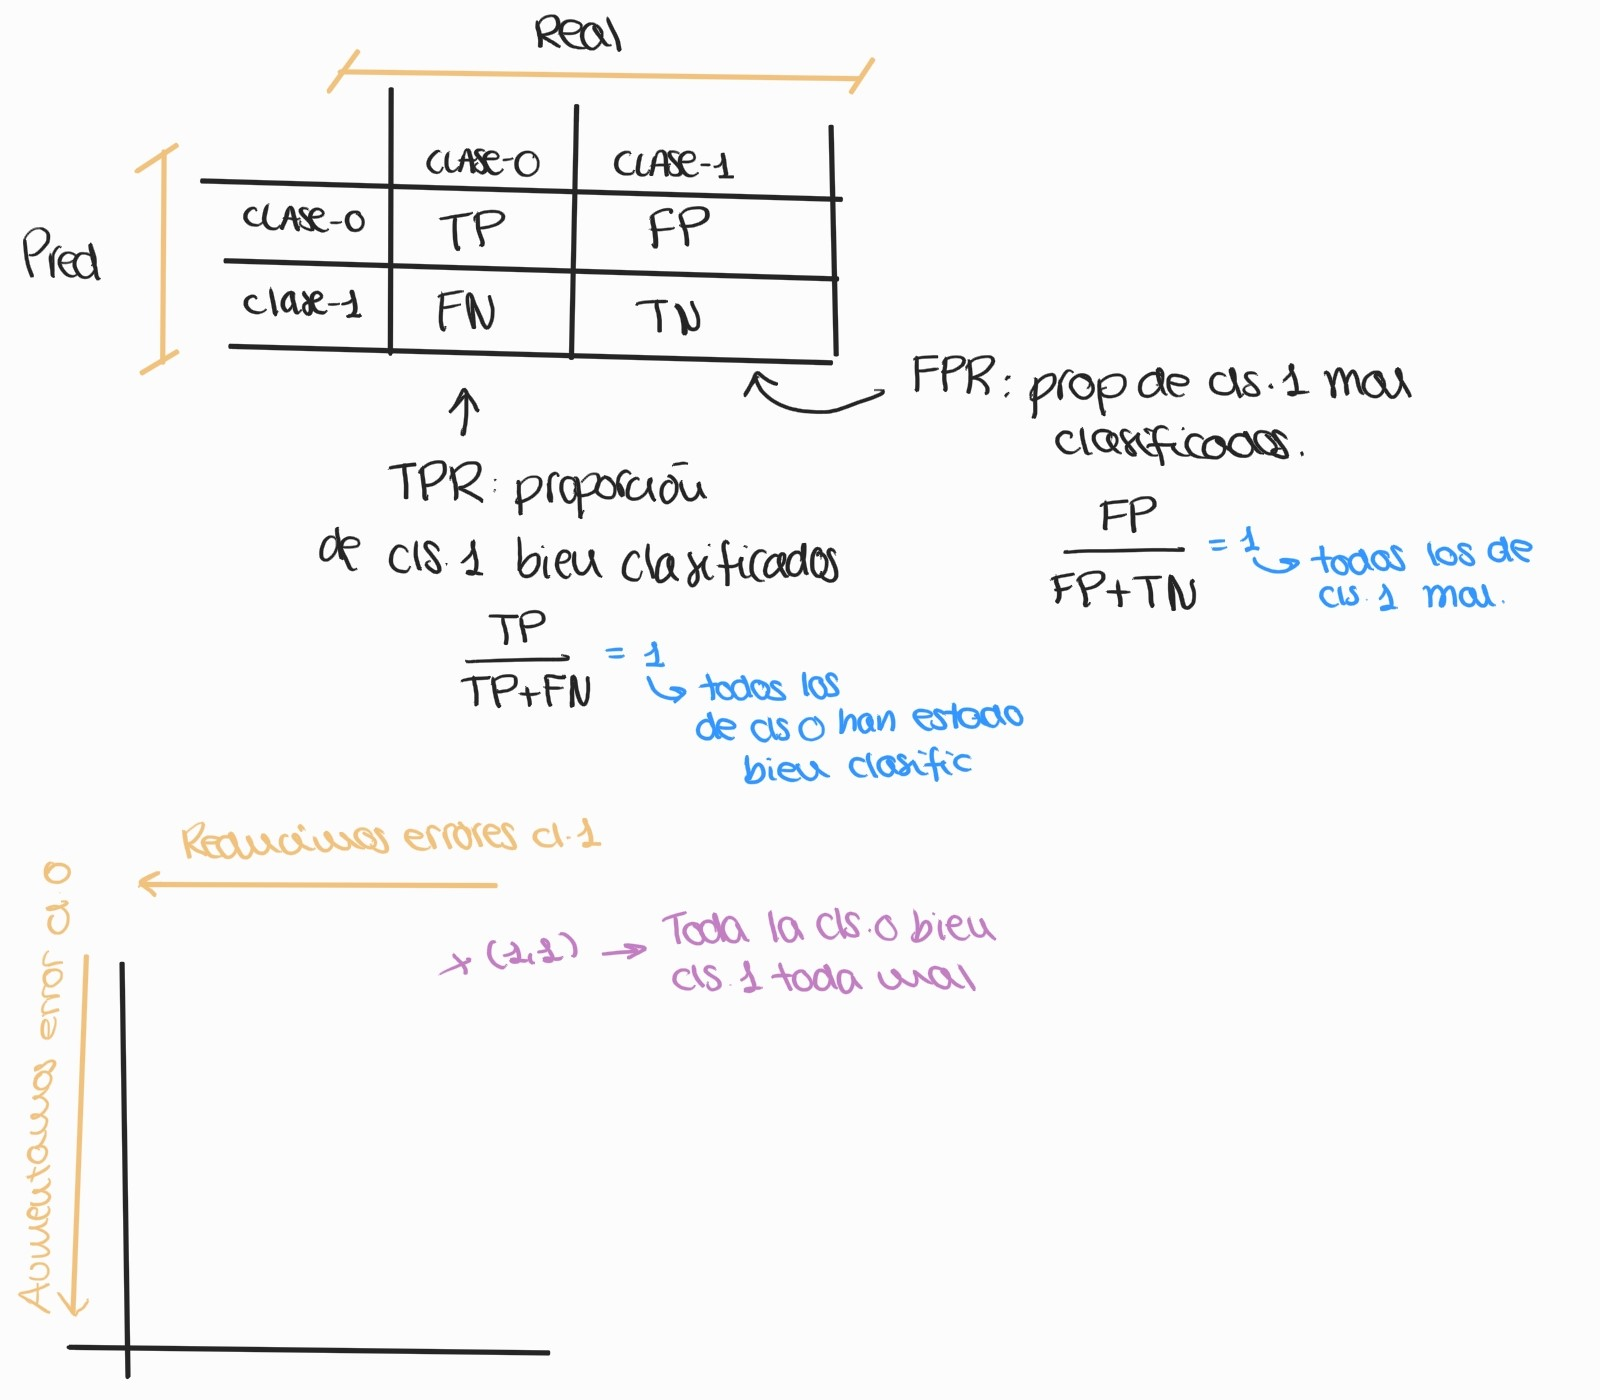

### **AUC** Area Under the Curve - Área bajo la curva

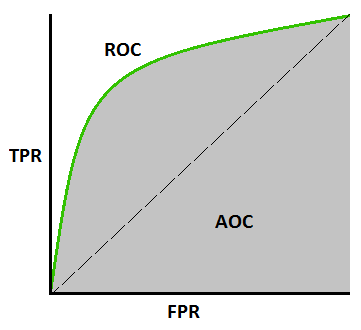

[6]

La AUC nos sirve únicamente para comparar entre distintos ROC, a mayor valor mejor.

**EJEMPLO ROC Y AUC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
threshold = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
threshold

{0: array([ 3.02104714,  2.02104714,  1.00481639, -4.52609987]),
 1: array([ 2.85925394,  1.85925394,  1.26150467,  1.09559697,  0.81555331,
         0.52118222,  0.49686389,  0.45117003,  0.30352361,  0.08125692,
        -0.16375641, -0.18330583, -0.38552687, -0.61435037, -0.63055749,
        -0.632603  , -0.63389114, -0.745494  , -0.78034106, -0.81345204,
        -0.992648  , -1.23856217, -1.25925978, -1.26337162, -1.38514338,
        -1.40495745, -1.4553286 , -1.5666668 , -1.56922072, -1.57001262,
        -1.71761586, -1.73306209, -4.48324144]),
 2: array([ 4.29458805,  3.29458805,  0.4569526 ,  0.44643708,  0.17950406,
        -0.04059996, -0.10964196, -6.83375894])}

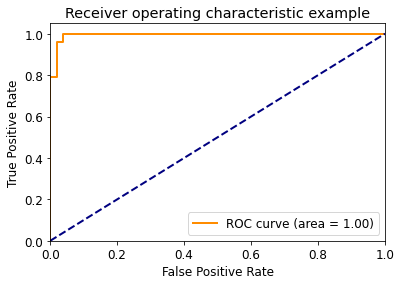

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Regresión

### **Mean Absolute Error**

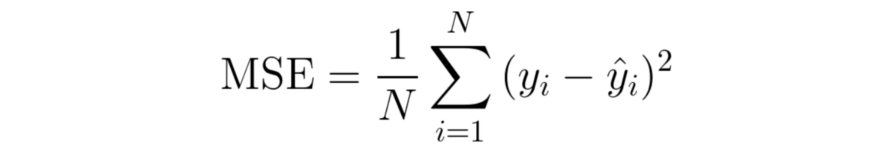

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

### **Mean Squared Error**

MAE is known to be more robust to the outliers than MSE. The main reason being that in MSE by squaring the errors, the outliers (which usually have higher errors than other samples) get more attention and dominance in the final error and impacting the model parameters.

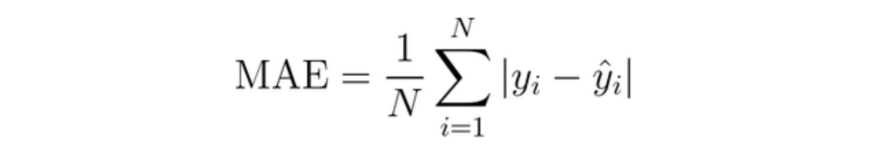

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

# Referencias

[1] https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

[2] https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html

[3] https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

[4] https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

[5] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

[6] https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/





